combining volume data (both Vaa3D and neuron_morphology driven), firing rate data, cell type information together

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 50)

In [31]:
volume_df = pd.read_csv('../result/extended_nm_Vaa3D_volume.tsv', sep='\t',index_col='Specimen_ID')

In [34]:
alias_df = pd.read_csv('../result/cell_alias.tsv',sep='\t',index_col='specimen_id')

In [35]:
alias_df.columns

Index(['e-type', 'm-type', 'me-type', 'upright_angle',
       'soma_distance_from_pia', 'estimated_shrinkage_factor',
       'estimated_slice_angle', 'line_name', 'specimen__hemisphere',
       'structure__acronym', 'structure_parent__acronym', 'structure__layer',
       'nr__max_euclidean_distance', 'nr__number_stems',
       'nr__number_bifurcations', 'nr__average_contraction',
       'nr__average_parent_daughter_ratio', 'ef__fast_trough_v_long_square',
       'ef__upstroke_downstroke_ratio_long_square', 'ef__adaptation',
       'ef__f_i_curve_slope', 'ef__threshold_i_long_square', 'ef__tau',
       'ef__avg_isi', 'ef__avg_firing_rate', 'ef__ri', 'ef__peak_t_ramp',
       'ef__vrest', 'si__height', 'si__width', 'csl__x', 'csl__y', 'csl__z',
       'csl__normalized_depth', 'cell_reporter_status', 'm__glif',
       'm__biophys', 'm__biophys_perisomatic', 'm__biophys_all_active',
       'tag__apical', 'tag__dendrite_type', 'donor__age', 'donor__sex',
       'donor__disease_state', 'dono

In [32]:
details_df = pd.read_csv('../data/cell_types_specimen_details.csv',sep='\t')

In [7]:
# Keep cells with avg firing rate data avaliable
info_df.dropna(subset=['ef__avg_firing_rate'],inplace=True)

In [11]:
info_df.rename(columns={'specimen_id':'Specimen_ID'},inplace=True)

In [18]:
info_df.set_index('Specimen_ID',inplace=True)

In [24]:
mouse_volume_df = volume_df[volume_df['Species']=='Mouse'].copy(deep=True)

In [25]:
human_volume_df = volume_df[volume_df['Species']=='Human'].copy(deep=True)

In [26]:
volume_df.shape

(668, 3)

In [28]:
mouse_volume_df.shape

(211, 3)

In [29]:
human_volume_df.shape

(156, 3)

In [19]:
df=pd.merge(left=volume_df,right=info_df,left_index=True,right_index=True,how='inner')

In [23]:
df[df['Species']!='Mouse']

Species  nm_volume  Vaa3D_volume e-type    m-type    me-type  \
Specimen_ID                                                                
313862022       NaN        NaN    306.290931  Exc_3   Spiny_8   ME_Exc_6   
314642645       NaN        NaN    142.208846  Exc_3   Spiny_3  ME_Exc_17   
314804042       NaN        NaN    338.776588  Exc_3   Spiny_4  ME_Exc_16   
314822529       NaN        NaN    556.481195  Exc_2  Spiny_16   ME_Exc_5   
314831019       NaN        NaN    642.658848  Exc_3   Spiny_8  ME_Exc_13   
...             ...        ...           ...    ...       ...        ...   
599334696       NaN        NaN    796.755963  Exc_3   Spiny_8  ME_Exc_13   
603402458       NaN        NaN   1084.488626  Exc_3  Spiny_17   ME_Exc_6   
603423462       NaN        NaN   1683.611965  Exc_3  Spiny_17   ME_Exc_6   
605660220       NaN        NaN    825.557790  Exc_3  Spiny_15  ME_Exc_10   
607124114       NaN        NaN    717.228601  Exc_3  Spiny_11   ME_Exc_5   

             upright_angle  soma_distance_from_pia  \
Specimen_ID                                          
313862022       150.319955              492.100275   
314642645       233.914695              372.685943   
314804042       238.336909              492.354331   
314822529        70.854578              729.838719   
314831019       332.697090              512.471548   
...                    ...                     ...   
599334696       163.378308              434.090752   
603402458       109.911537              693.761546   
603423462       195.959925              832.563973   
605660220       152.579440              788.851944   
607124114       152.572345              491.233130   

             estimated_shrinkage_factor  estimated_slice_angle  \
Specimen_ID                                                      
313862022                      2.977636             -25.453107   
314642645                      2.251238              24.773125   
314804042                      2.874654             -12.595367   
314822529                      2.300419              -4.241616   
314831019                      2.473288              11.899382   
...                                 ...                    ...   
599334696                      3.281250              35.926281   
603402458                      2.532554              23.979080   
603423462                      2.226190              37.752837   
605660220                      2.927690              13.943304   
607124114                      3.298753               9.472663   

                      line_name specimen__hemisphere structure__acronym  \
Specimen_ID                                                               
313862022        Scnn1a-Tg2-Cre                right              VISp4   
314642645        Rorb-IRES2-Cre                right              VISp4   
314804042        Rorb-IRES2-Cre                 left              VISp5   
314822529        Rorb-IRES2-Cre                 left              VISp5   
314831019        Scnn1a-Tg3-Cre                 left              VISp5   
...                         ...                  ...                ...   
599334696         Tlx3-Cre_PL56                 left              VISp5   
603402458    Penk-IRES2-Cre-neo                 left            VISli6a   
603423462    Penk-IRES2-Cre-neo                right             VISp6a   
605660220    Penk-IRES2-Cre-neo                 left             VISp6a   
607124114         Tlx3-Cre_PL56                 left              VISp5   

            structure_parent__acronym structure__layer  \
Specimen_ID                                              
313862022                        VISp                4   
314642645                        VISp                4   
314804042                        VISp                5   
314822529                        VISp                5   
314831019                        VISp                5   
...                               ...              ...   
599334696            

In [8]:
# get cell details only of cells that has average firing rate data avaliable 
lite_info_df = info_df.dropna(subset=['ef__avg_firing_rate'])

In [9]:
# cells that have data on both cell volume and FR
lite_df = pd.merge(left=volume_df,right=lite_info_df,left_on='Specimen_ID',right_on='specimen__id',how='inner')

In [10]:
# clean up unneeded columns
lite_df.drop(['specimen__id','donor__species','donor__name','specimen__name','structure__id','structure__name','ephys_thumb_path','ephys_inst_thresh_thumb_path'],axis=1,inplace=True)
lite_df.drop(['structure_parent__id','morph_thumb_path','donor__id'],axis=1,inplace=True)
lite_df.drop(['nr__reconstruction_type','nrwkf__id','erwkf__id','si__path'],axis=1,inplace=True)

In [11]:
lite_df

Species  Specimen_ID  Total_Volume                   line_name  \
0     Mouse    530737765   3417.700939                Nos1-CreERT2   
1     Mouse    584872371   1615.318717             Htr3a-Cre_NO152   
2     Mouse    574038330   3222.967900  Nos1-CreERT2|Sst-IRES-FlpO   
3     Mouse    477127614   1757.481249            Slc17a6-IRES-Cre   
4     Mouse    560965993   2754.122168                Nos1-CreERT2   
..      ...          ...           ...                         ...   
341   Human    569844159   3147.658523                         NaN   
342   Human    528636794   7107.722594                         NaN   
343   Human    508298270  16576.774950                         NaN   
344   Human    527952884   2222.127063                         NaN   
345   Human    561469082   7546.625958                         NaN   

    specimen__hemisphere structure__acronym structure_parent__acronym  \
0                  right              VISp5                      VISp   
1                  right              VISp5                      VISp   
2                   left             VISp6a                      VISp   
3                   left            VISp2/3                      VISp   
4                   left              VISp4                      VISp   
..                   ...                ...                       ...   
341                right                MTG                       MTG   
342                 left                MTG                       MTG   
343                right                MTG                       MTG   
344                 left                MTG                       MTG   
345                 left                MTG                       MTG   

    structure__layer  nr__max_euclidean_distance  nr__number_stems  \
0                  5                  258.352525               5.0   
1                  5                  423.246110               4.0   
2                 6a                  391.907793               3.0   
3                2/3                  322.035803               8.0   
4                  4                   98.478472               5.0   
..               ...                         ...               ...   
341                3                  518.118474               6.0   
342                5                 1079.564411               5.0   
343                3                  389.401973               6.0   
344                4                  610.853424               5.0   
345                5                  379.953367               3.0   

     nr__number_bifurcations  nr__average_contraction  \
0                       20.0                 0.835590   
1                       13.0                 0.873600   
2                       22.0                 0.861651   
3                       14.0                 0.889290   
4                       38.0                 0.908527   
..                       ...                      ...   
341                     27.0                 0.912524   
342                     37.0                 0.893656   
343                     43.0                 0.809299   
344                     18.0                 0.882849   
345                     20.0                 0.891355   

     nr__average_parent_daughter_ratio  ef__fast_trough_v_long_square  \
0                             1.000000                     -59.468754   
1                             1.000000                     -50.843754   
2                             0.966491                     -50.187504   
3                             0.747879                     -52.093750   
4                             0.994179                     -48.875004   
..                                 ...                            ...   
341                           0.991600                     -51.718754   
342                           0.917695                     -53.437500   
343                           0.988117                     -46.562504   
344                           

In [36]:
set(lite_df[lite_df['tag__apical']=='intact']['tag__dendrite_type'])

{'spiny'}

In [37]:
set(lite_df[lite_df['tag__apical']=='truncated']['tag__dendrite_type'])

{'spiny'}

In [41]:
set(lite_df[lite_df['tag__apical'].isna()]['tag__dendrite_type'])

{'aspiny', 'sparsely spiny'}

In [18]:
human_df = lite_df[lite_df['Species']=='Human']

In [24]:
mouse_df = lite_df[lite_df['Species']=='Mouse']

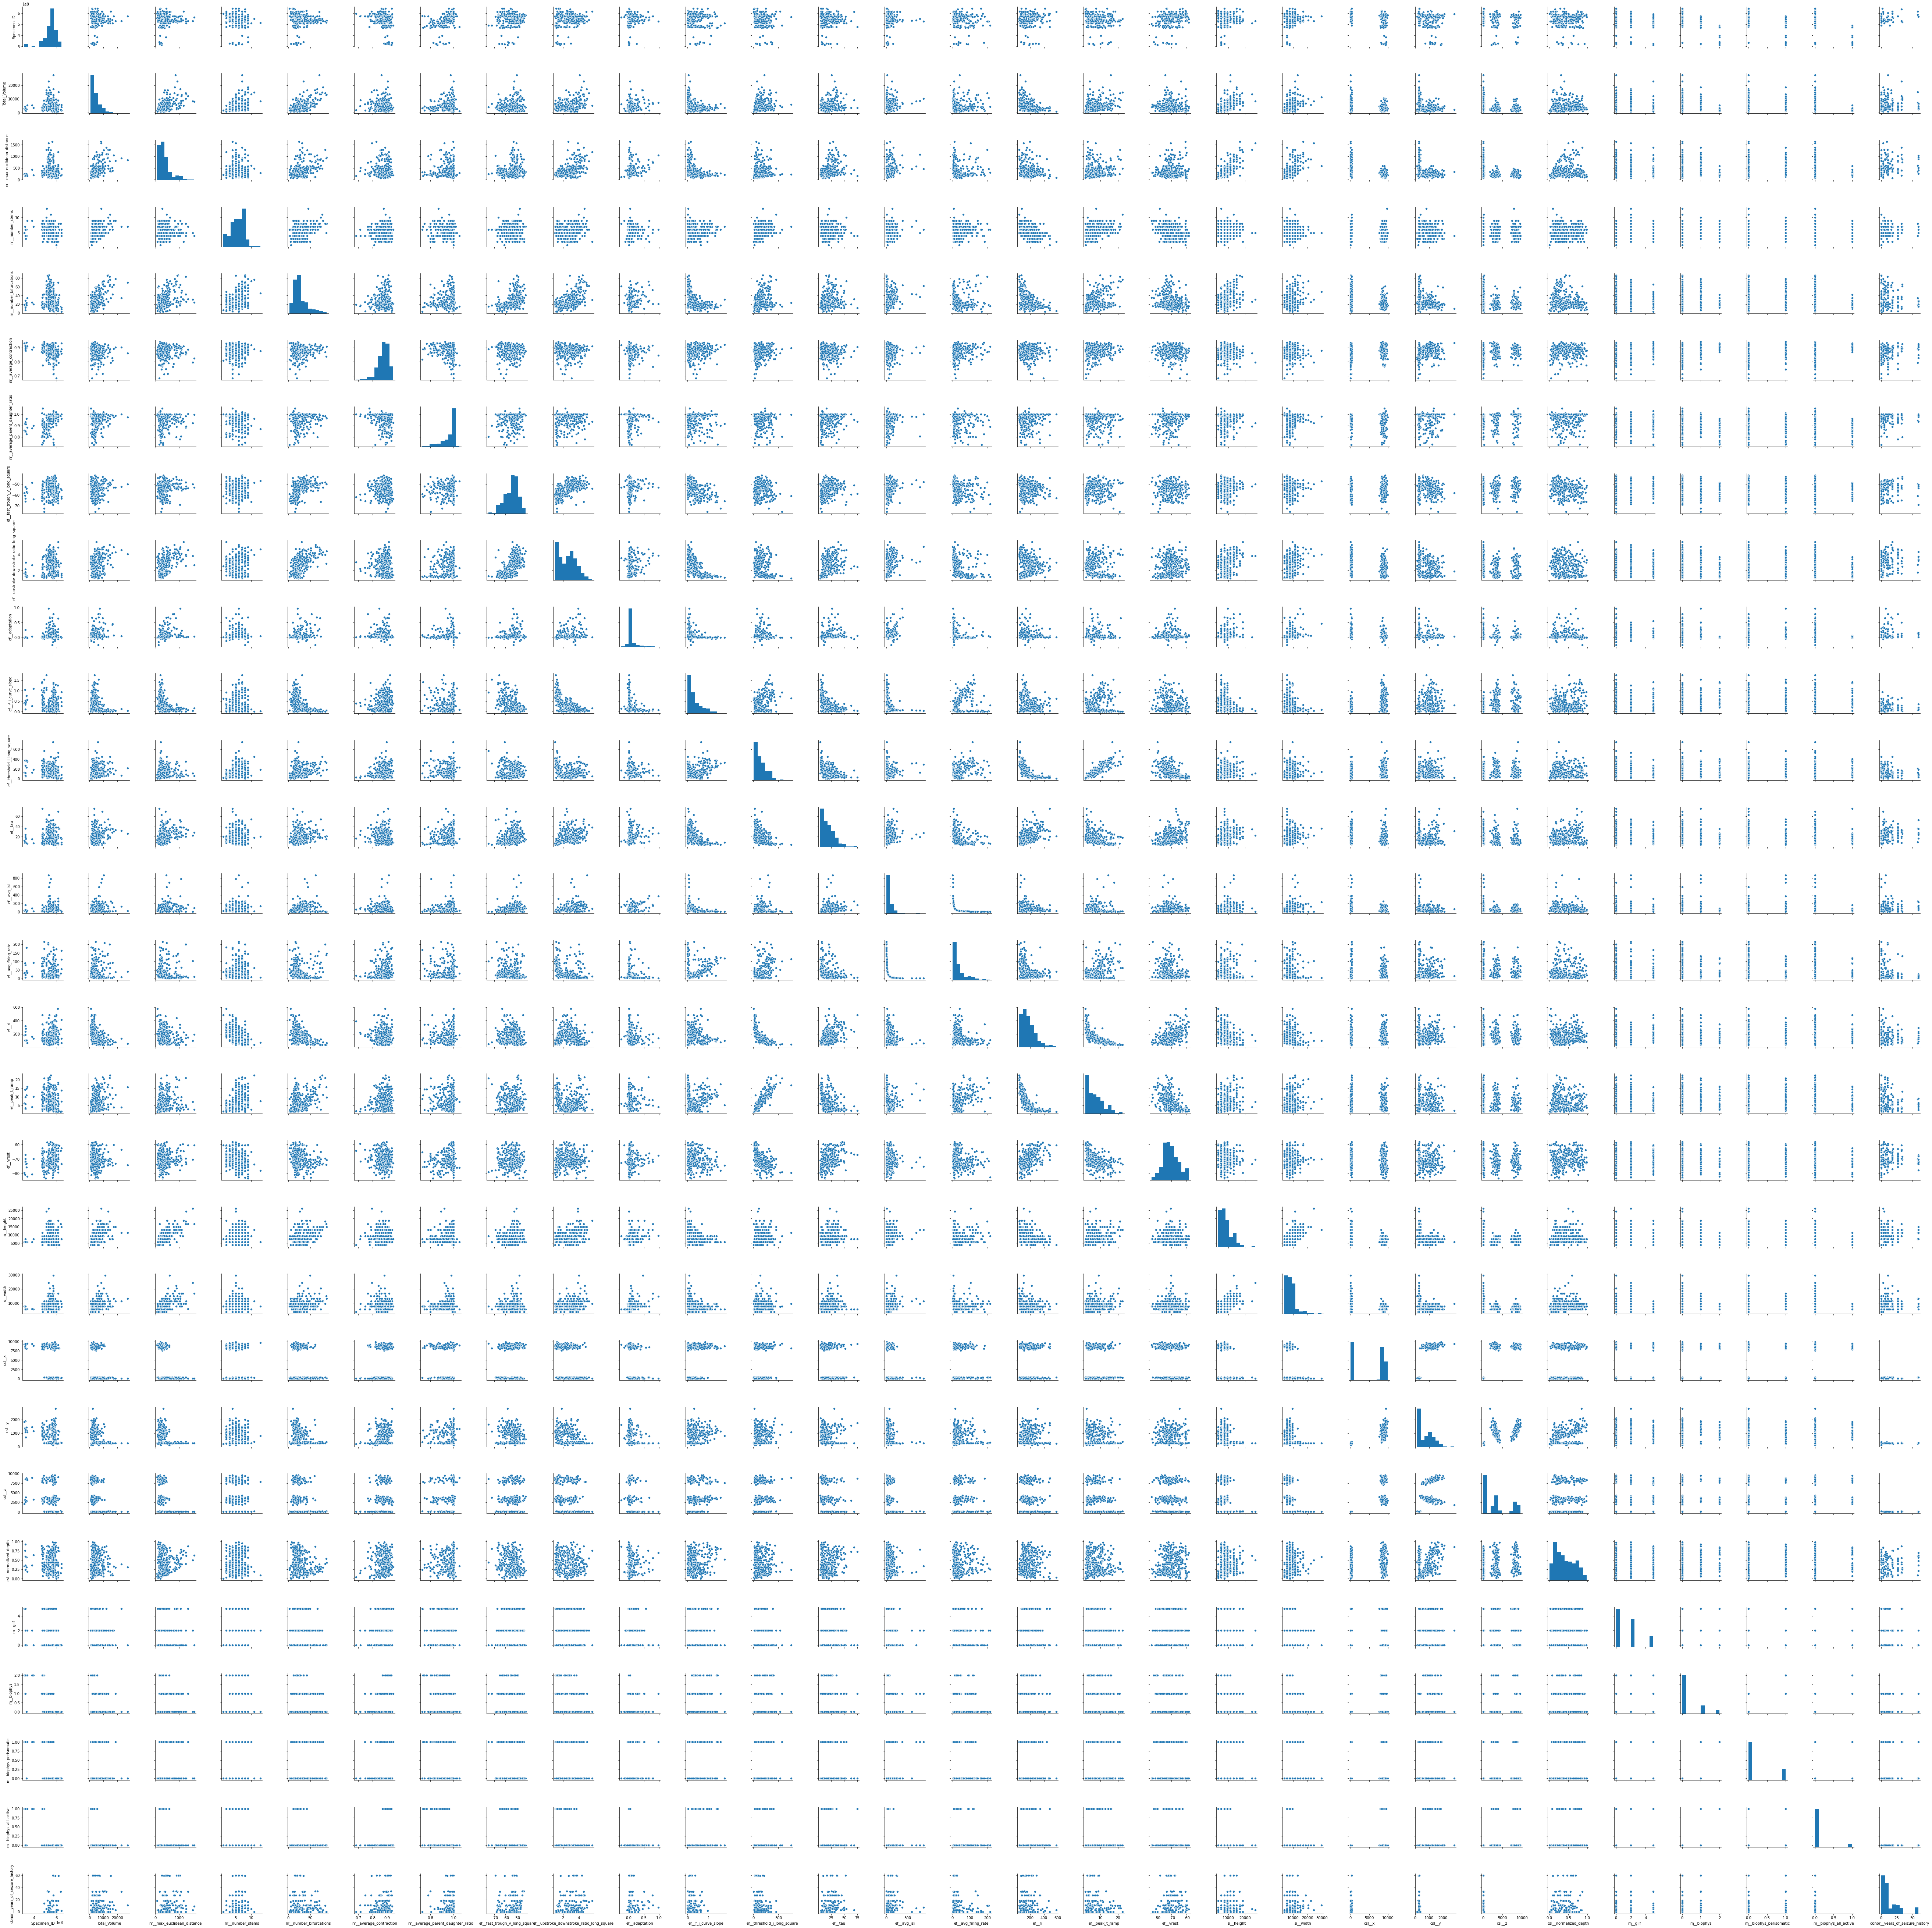

In [26]:
sns.pairplot(lite_df)

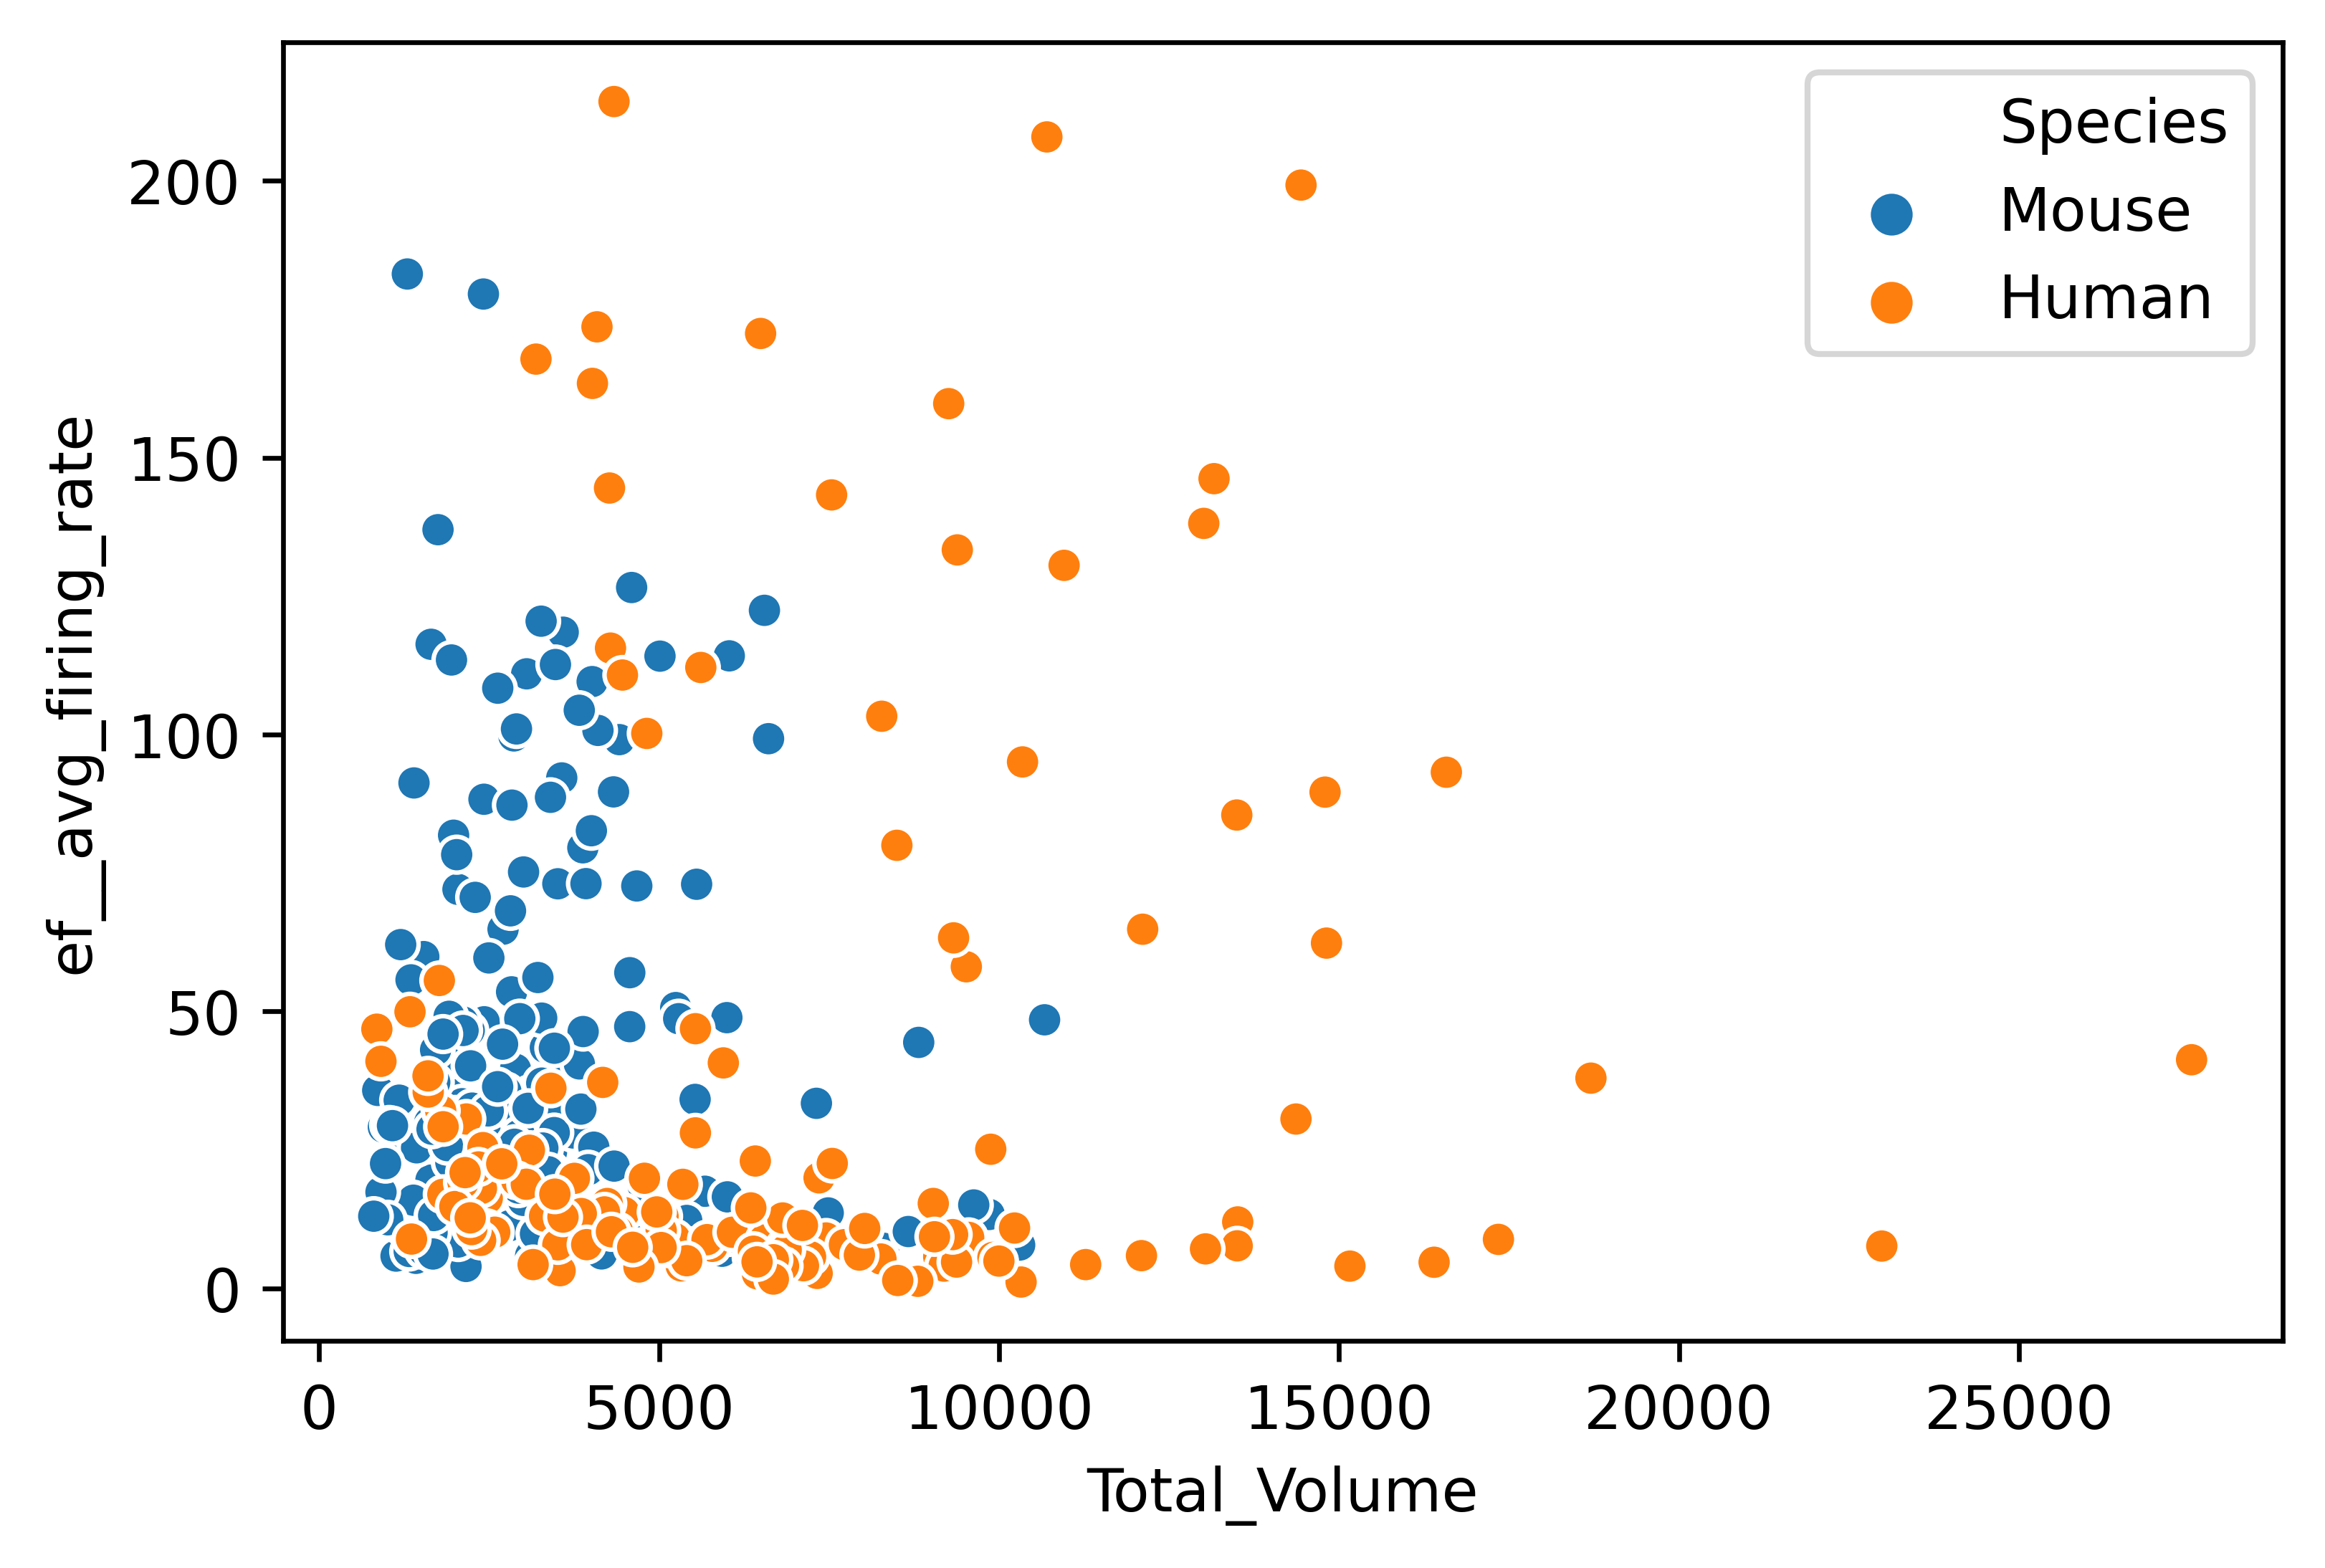

In [12]:
sns.scatterplot(data=lite_df,x='Total_Volume',y='ef__avg_firing_rate', hue='Species')

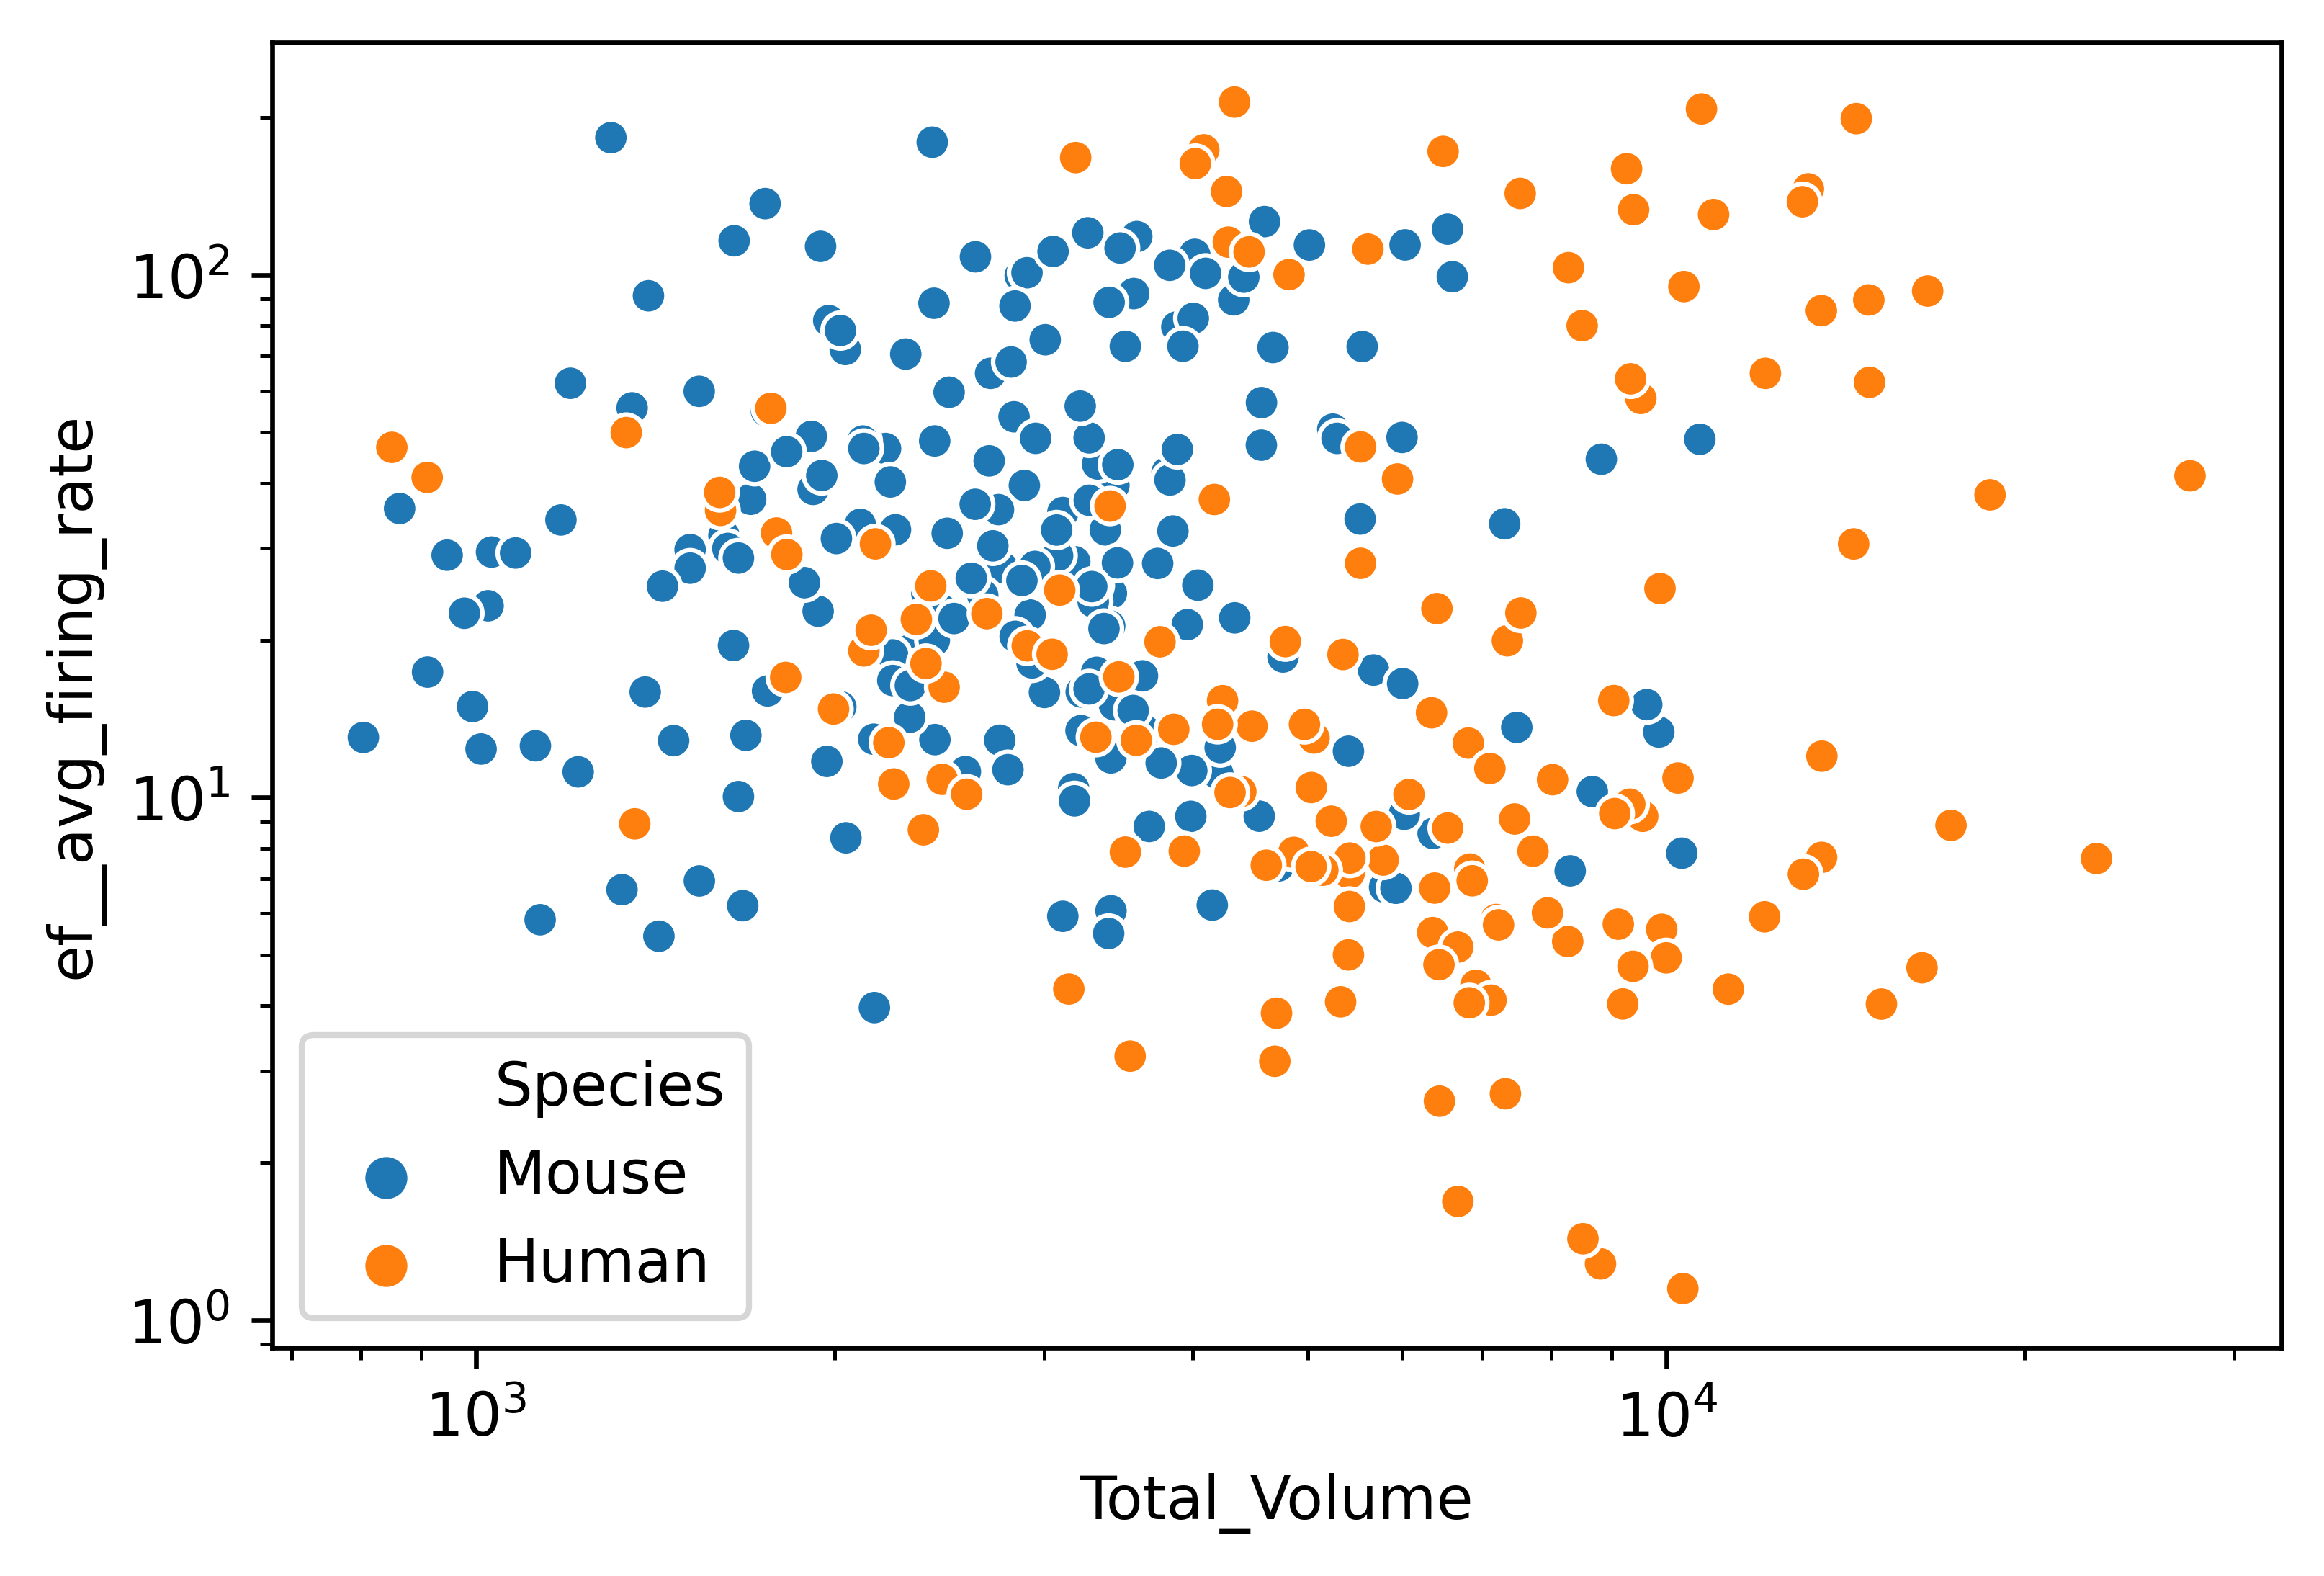

In [13]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set(xscale='log',yscale='log')
sns.scatterplot(data=lite_df,x='Total_Volume',y='ef__avg_firing_rate', hue='Species')

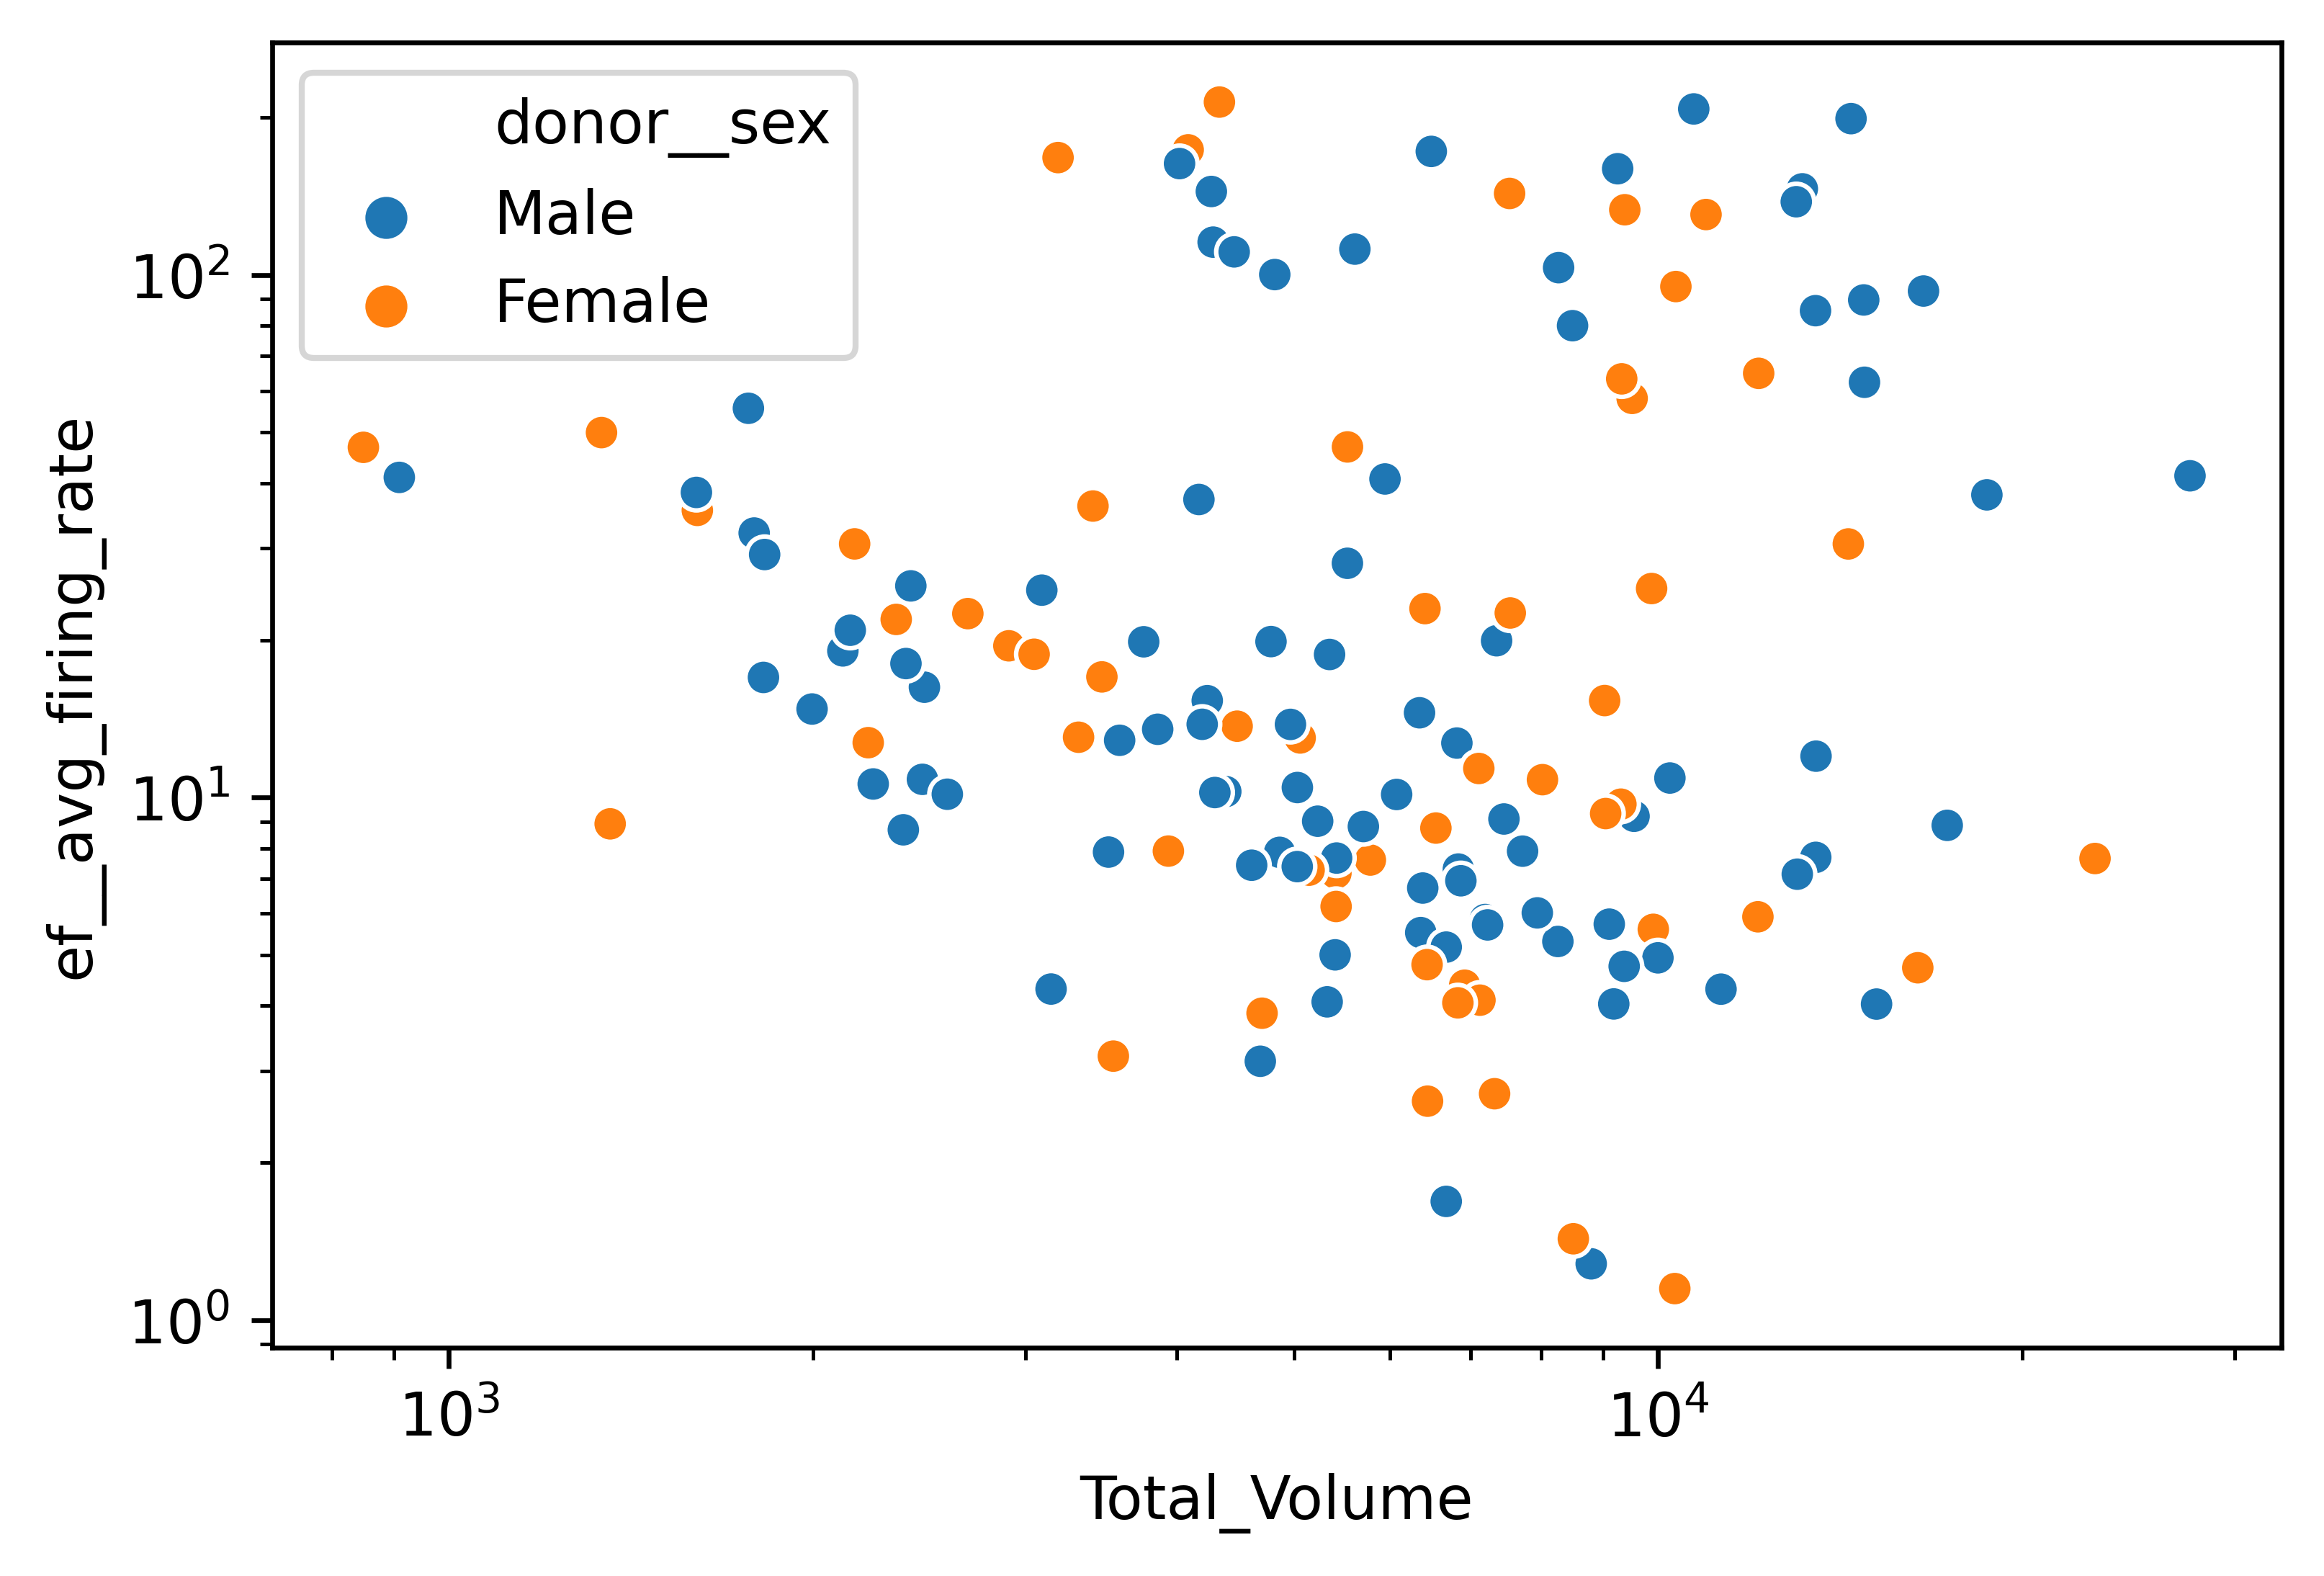

In [15]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set(xscale='log',yscale='log')
sns.scatterplot(data=lite_df,x='Total_Volume',y='ef__avg_firing_rate', hue='donor__sex')

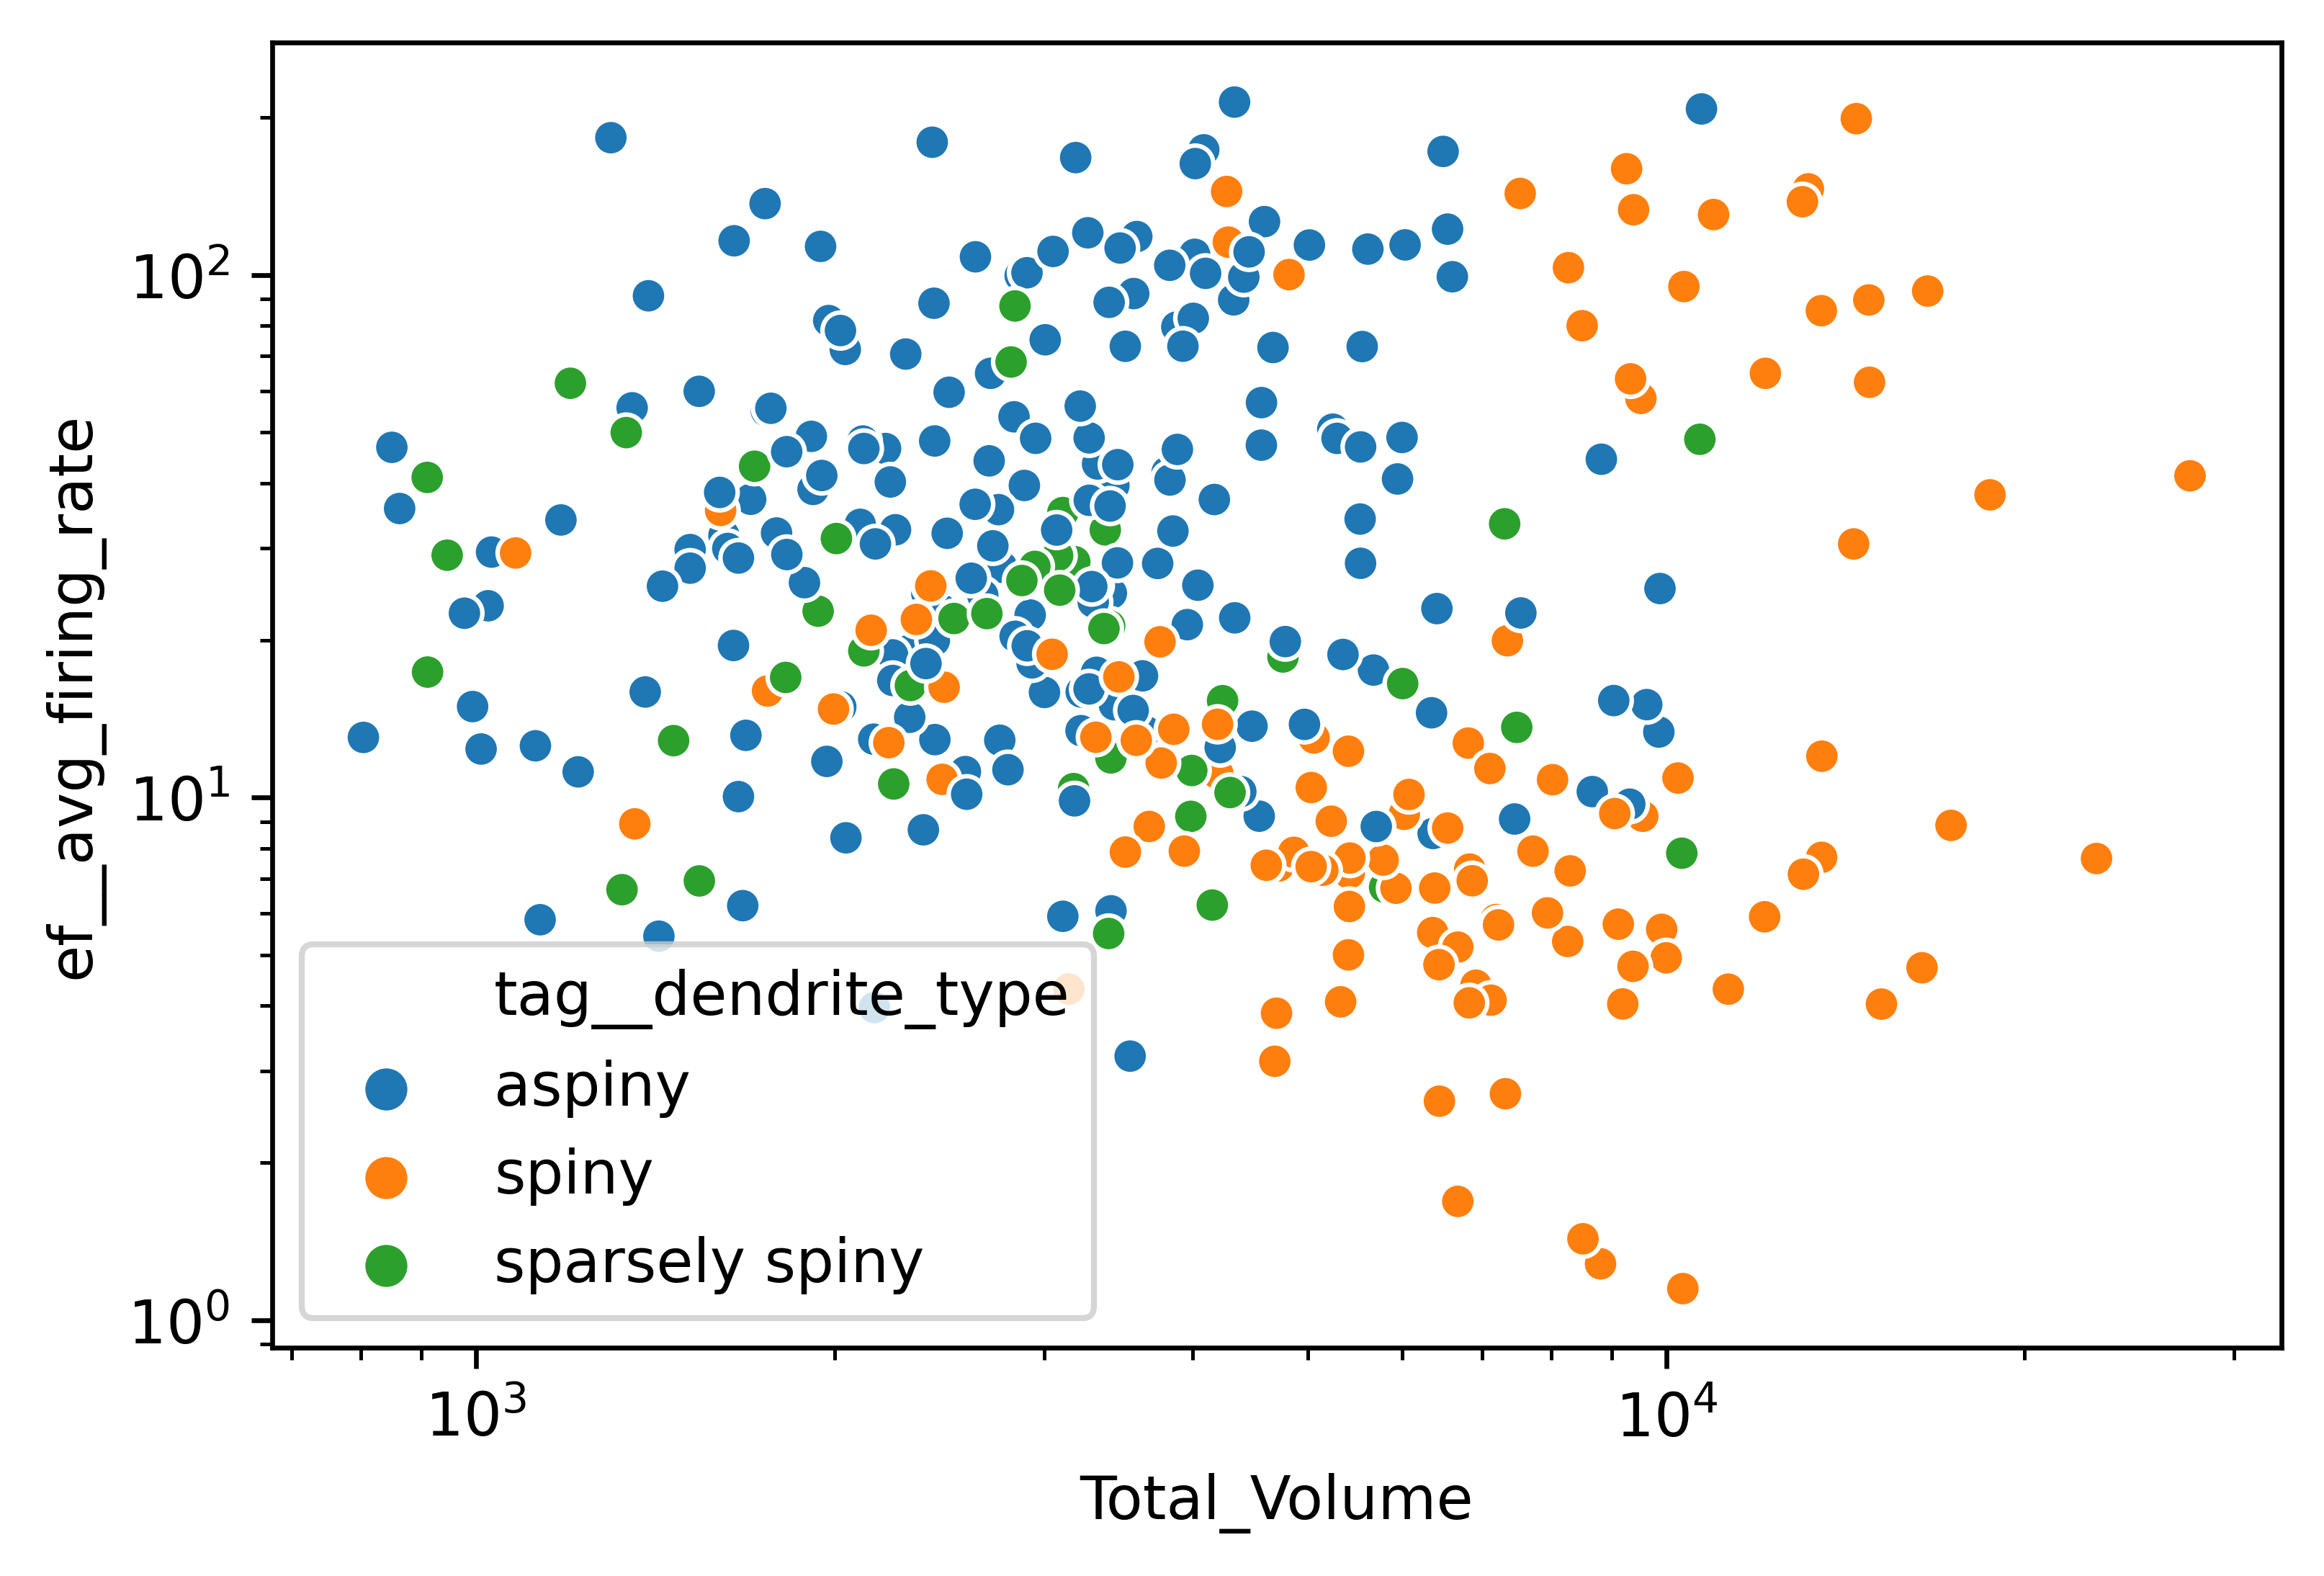

In [16]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set(xscale='log',yscale='log')
sns.scatterplot(data=lite_df,x='Total_Volume',y='ef__avg_firing_rate', hue='tag__dendrite_type')

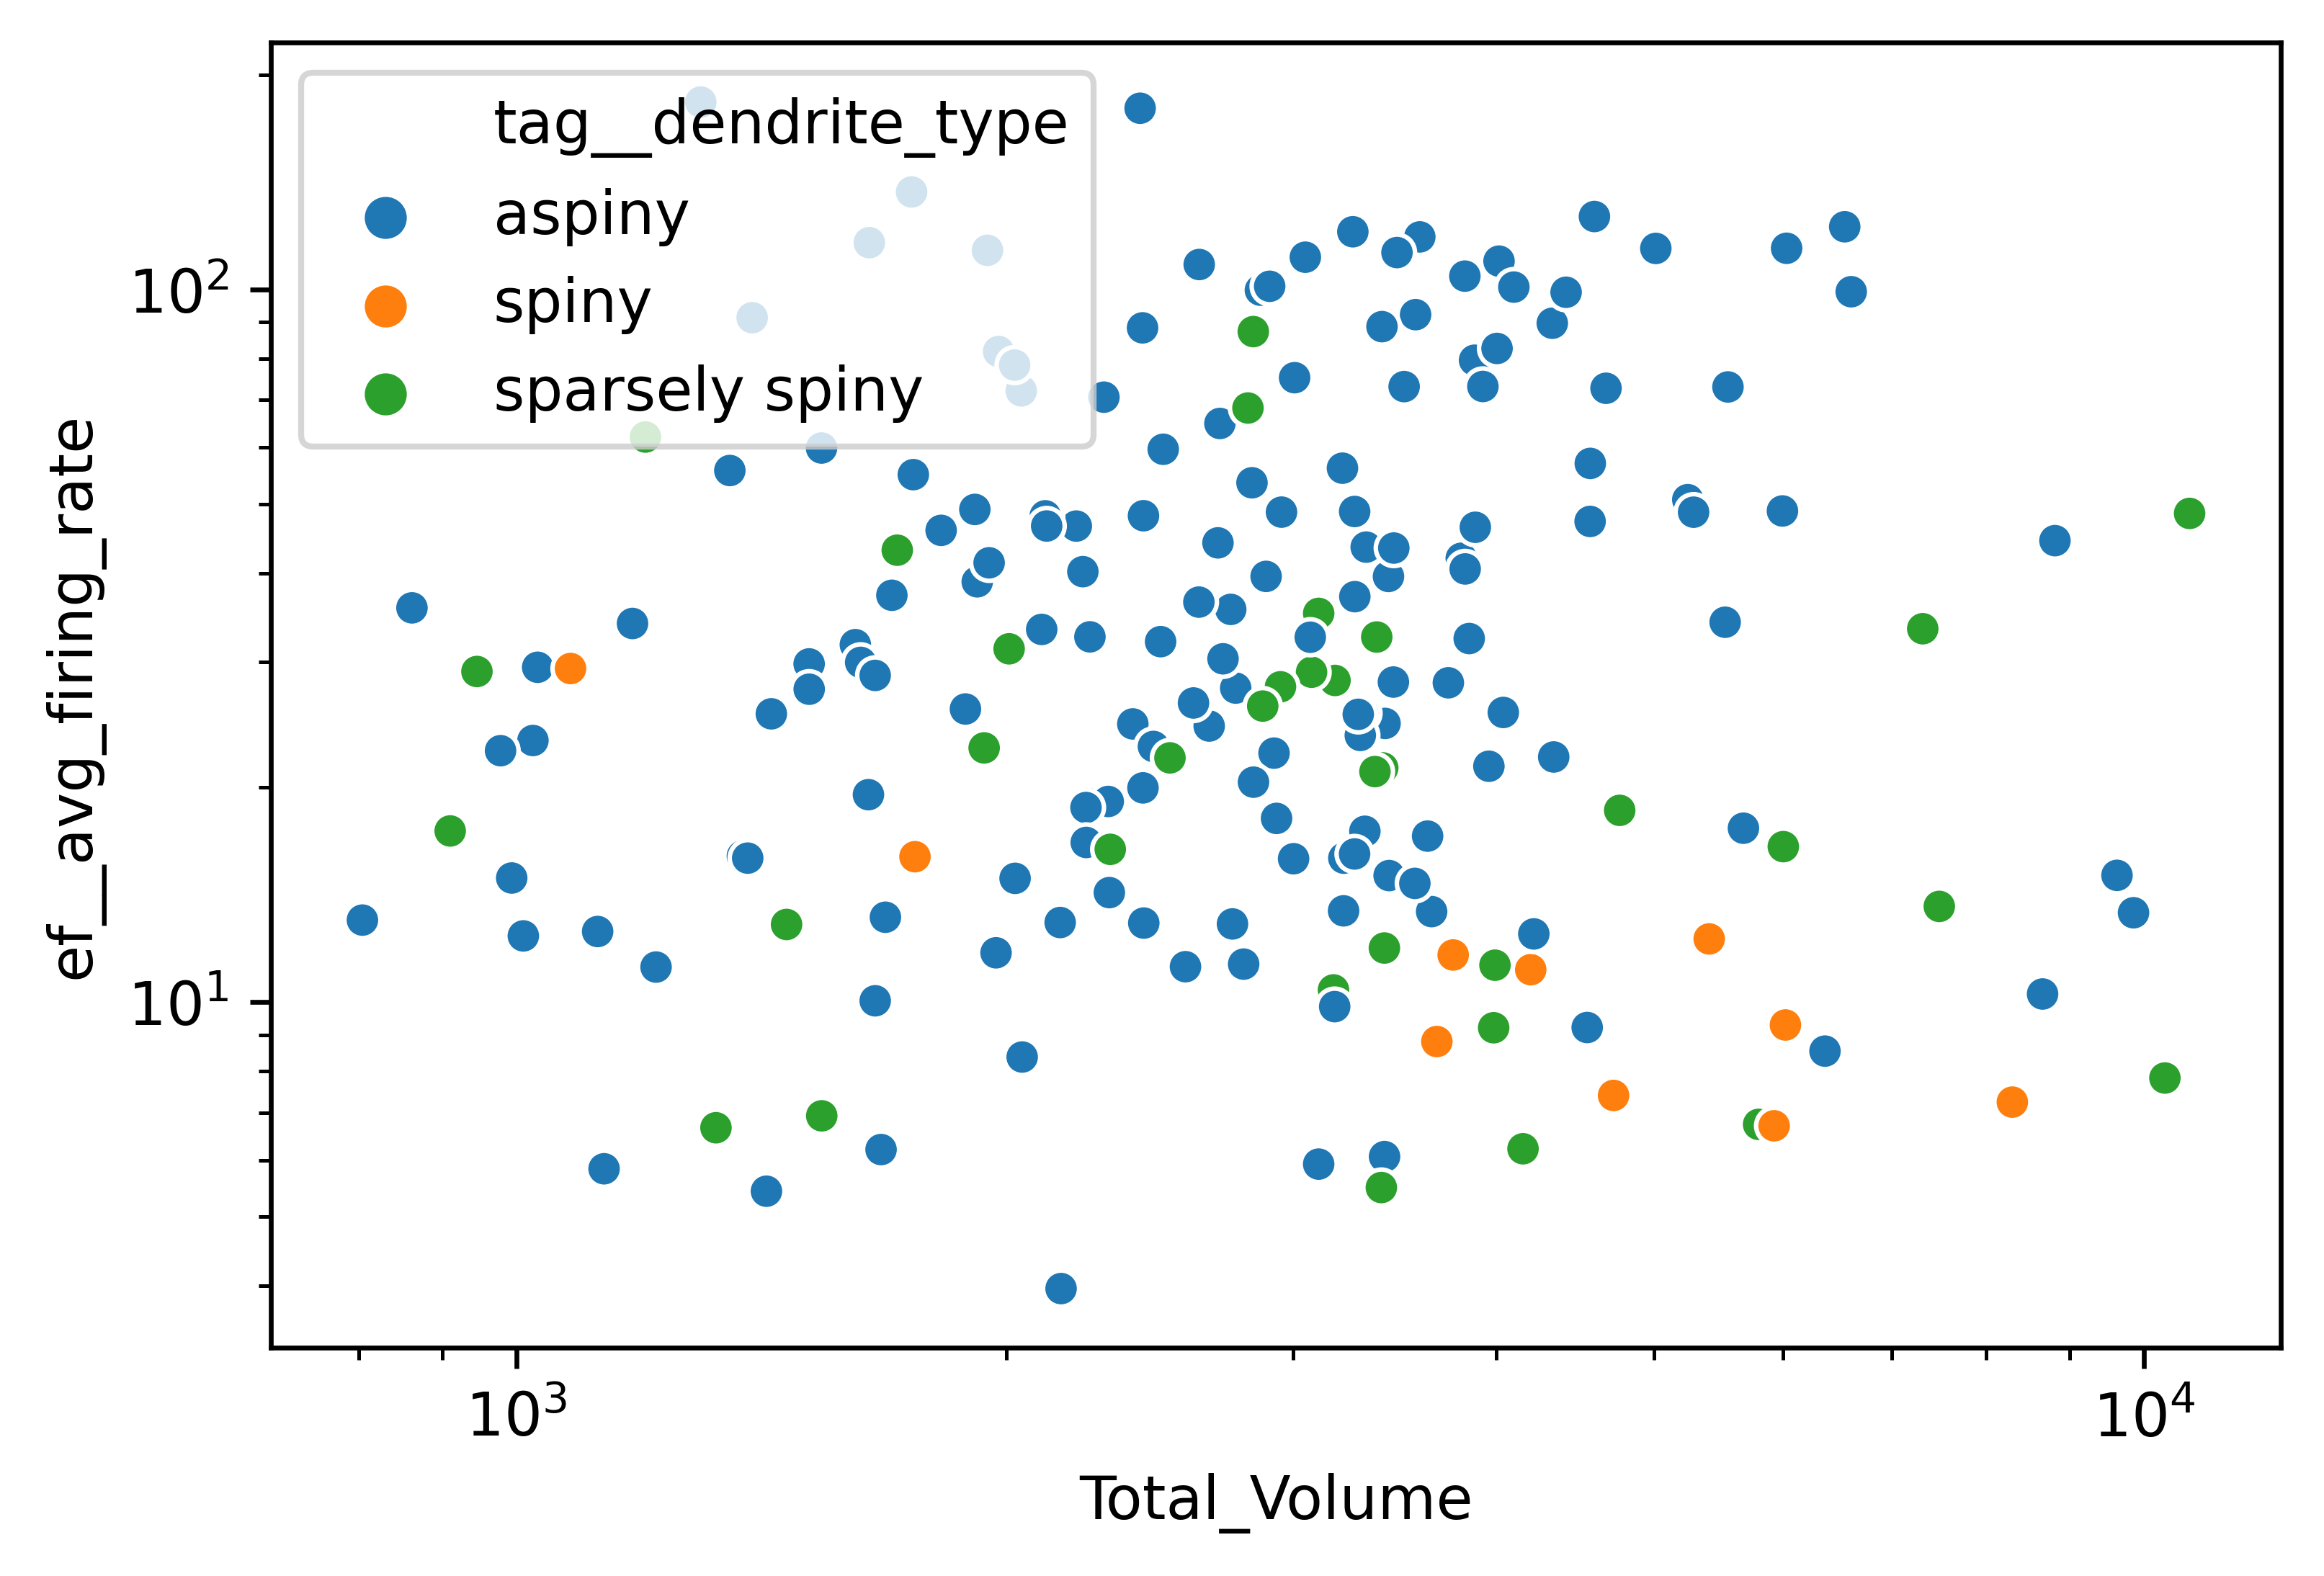

In [25]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set(xscale='log',yscale='log')
sns.scatterplot(data=mouse_df,x='Total_Volume',y='ef__avg_firing_rate', hue='tag__dendrite_type')

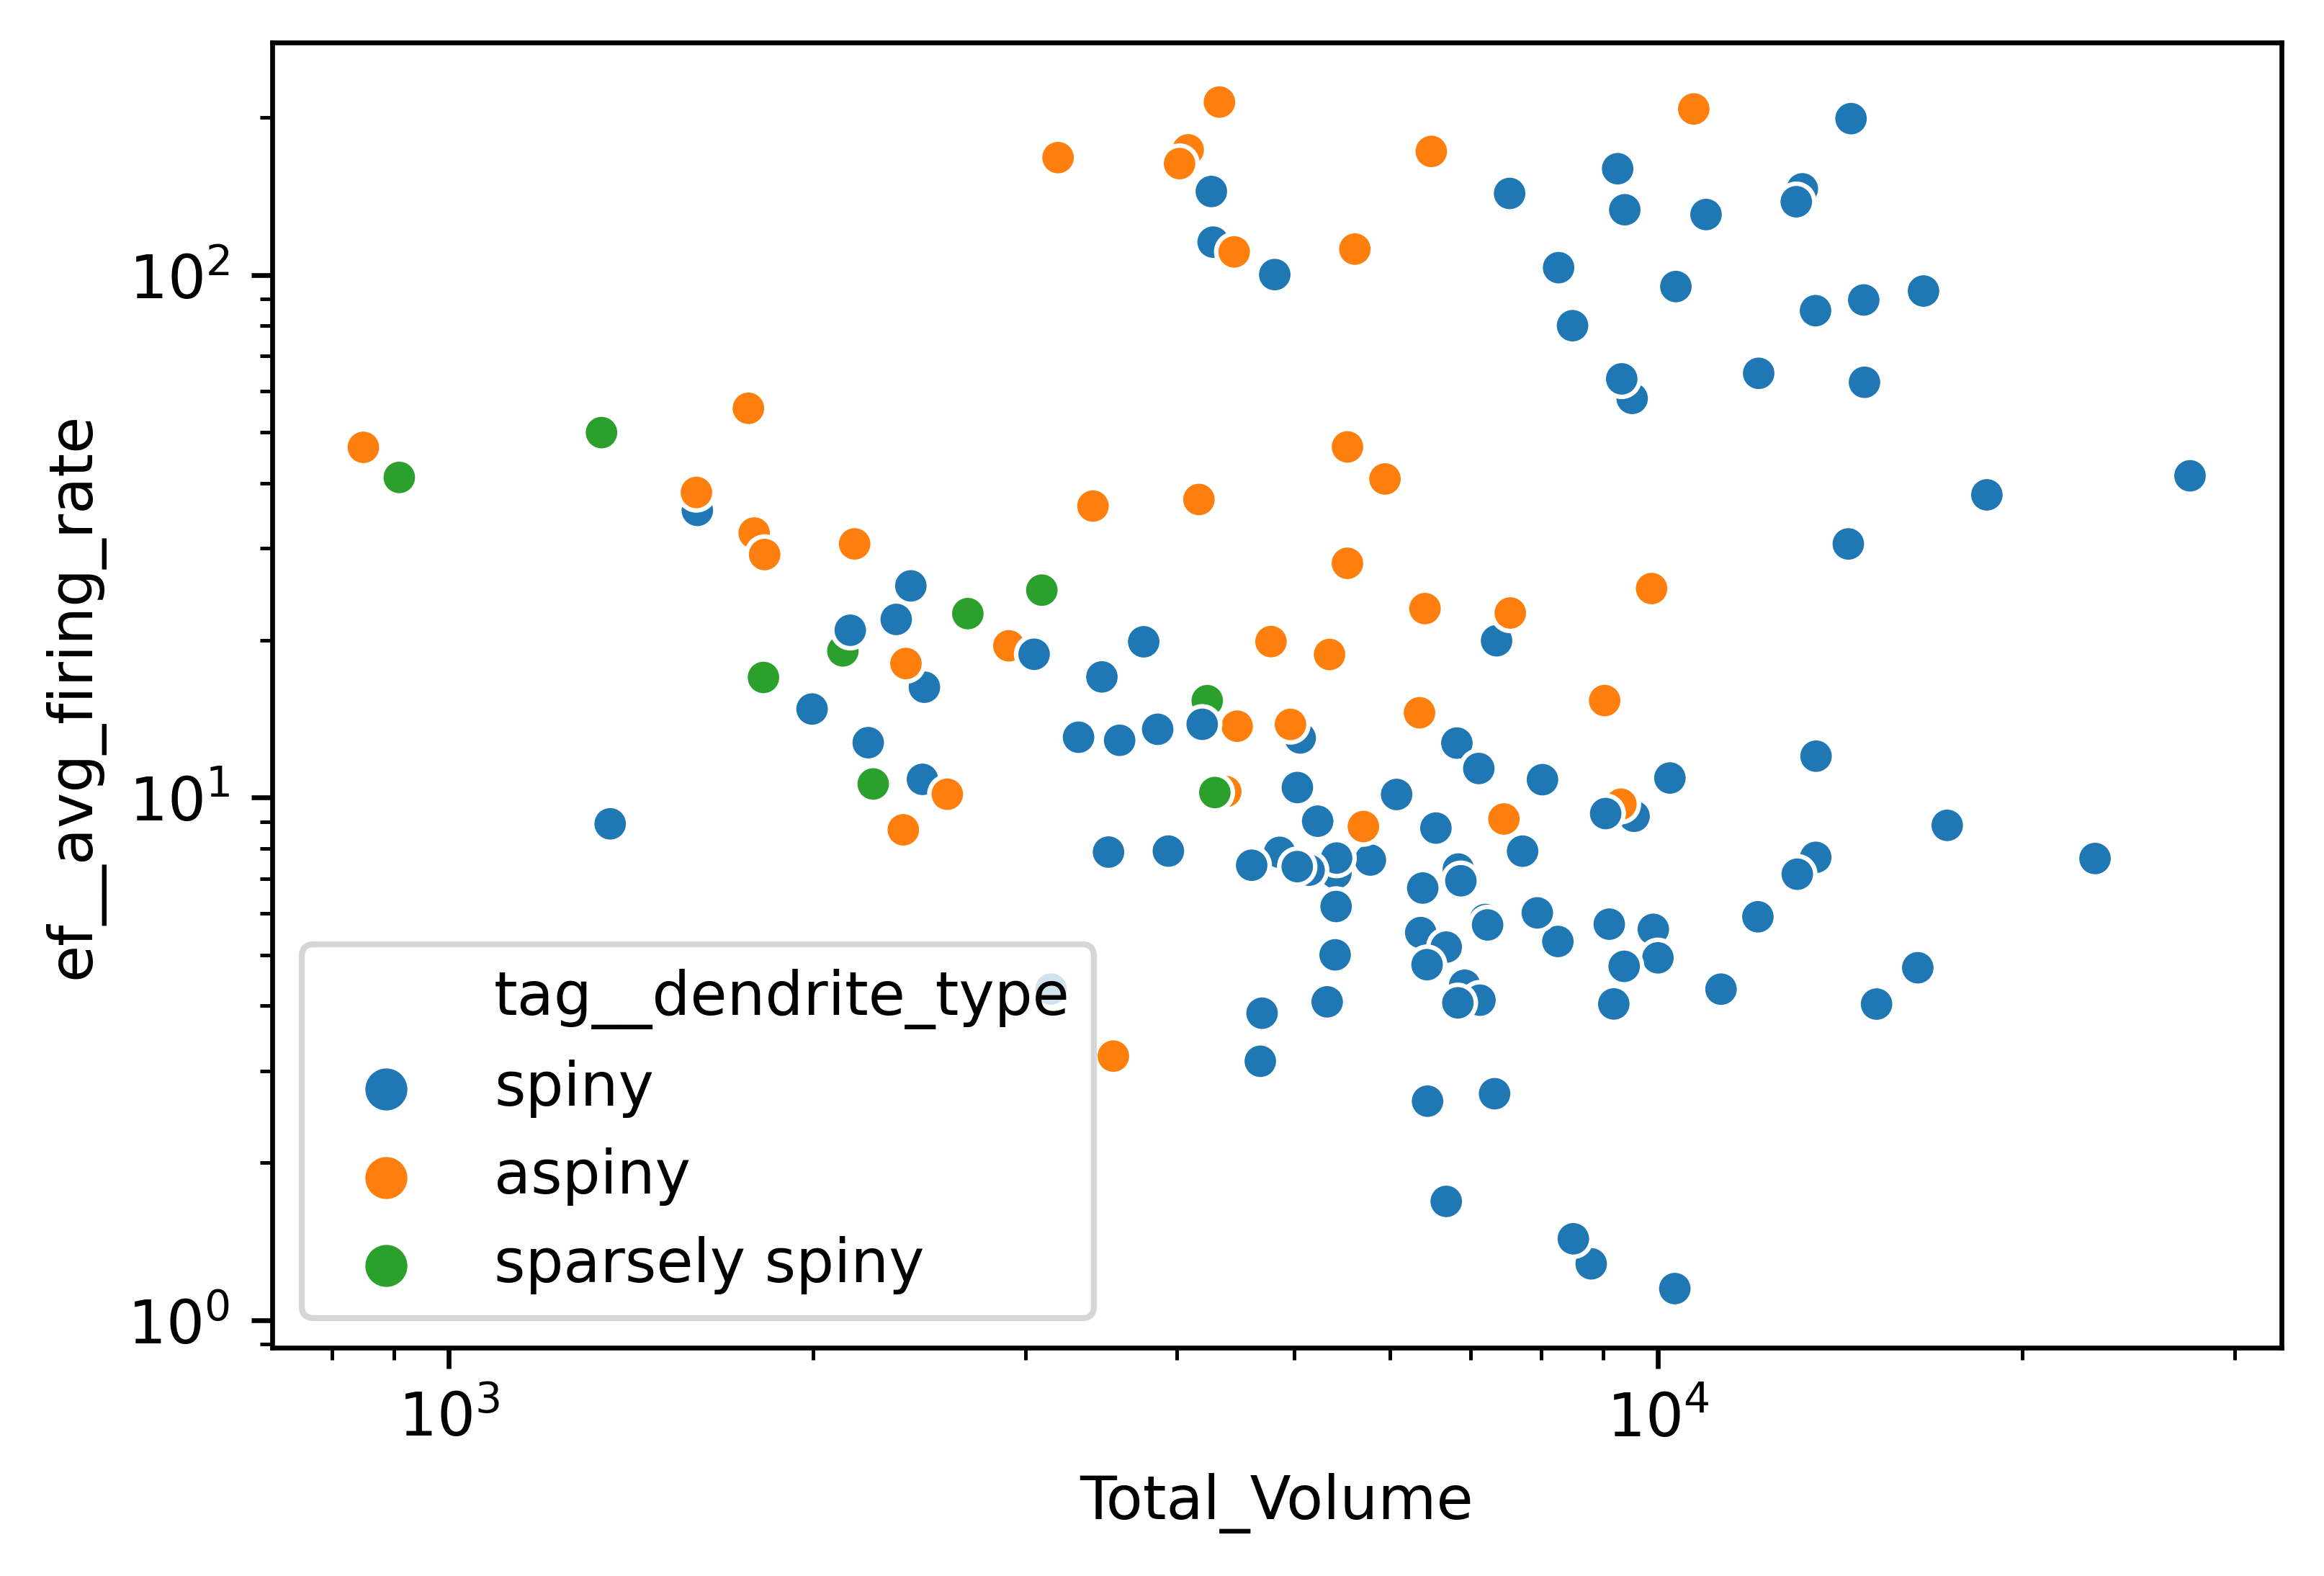

In [22]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set(xscale='log',yscale='log')
sns.scatterplot(data=human_df,x='Total_Volume',y='ef__avg_firing_rate', hue='tag__dendrite_type')

ValueError: The palette list has the wrong number of colors.

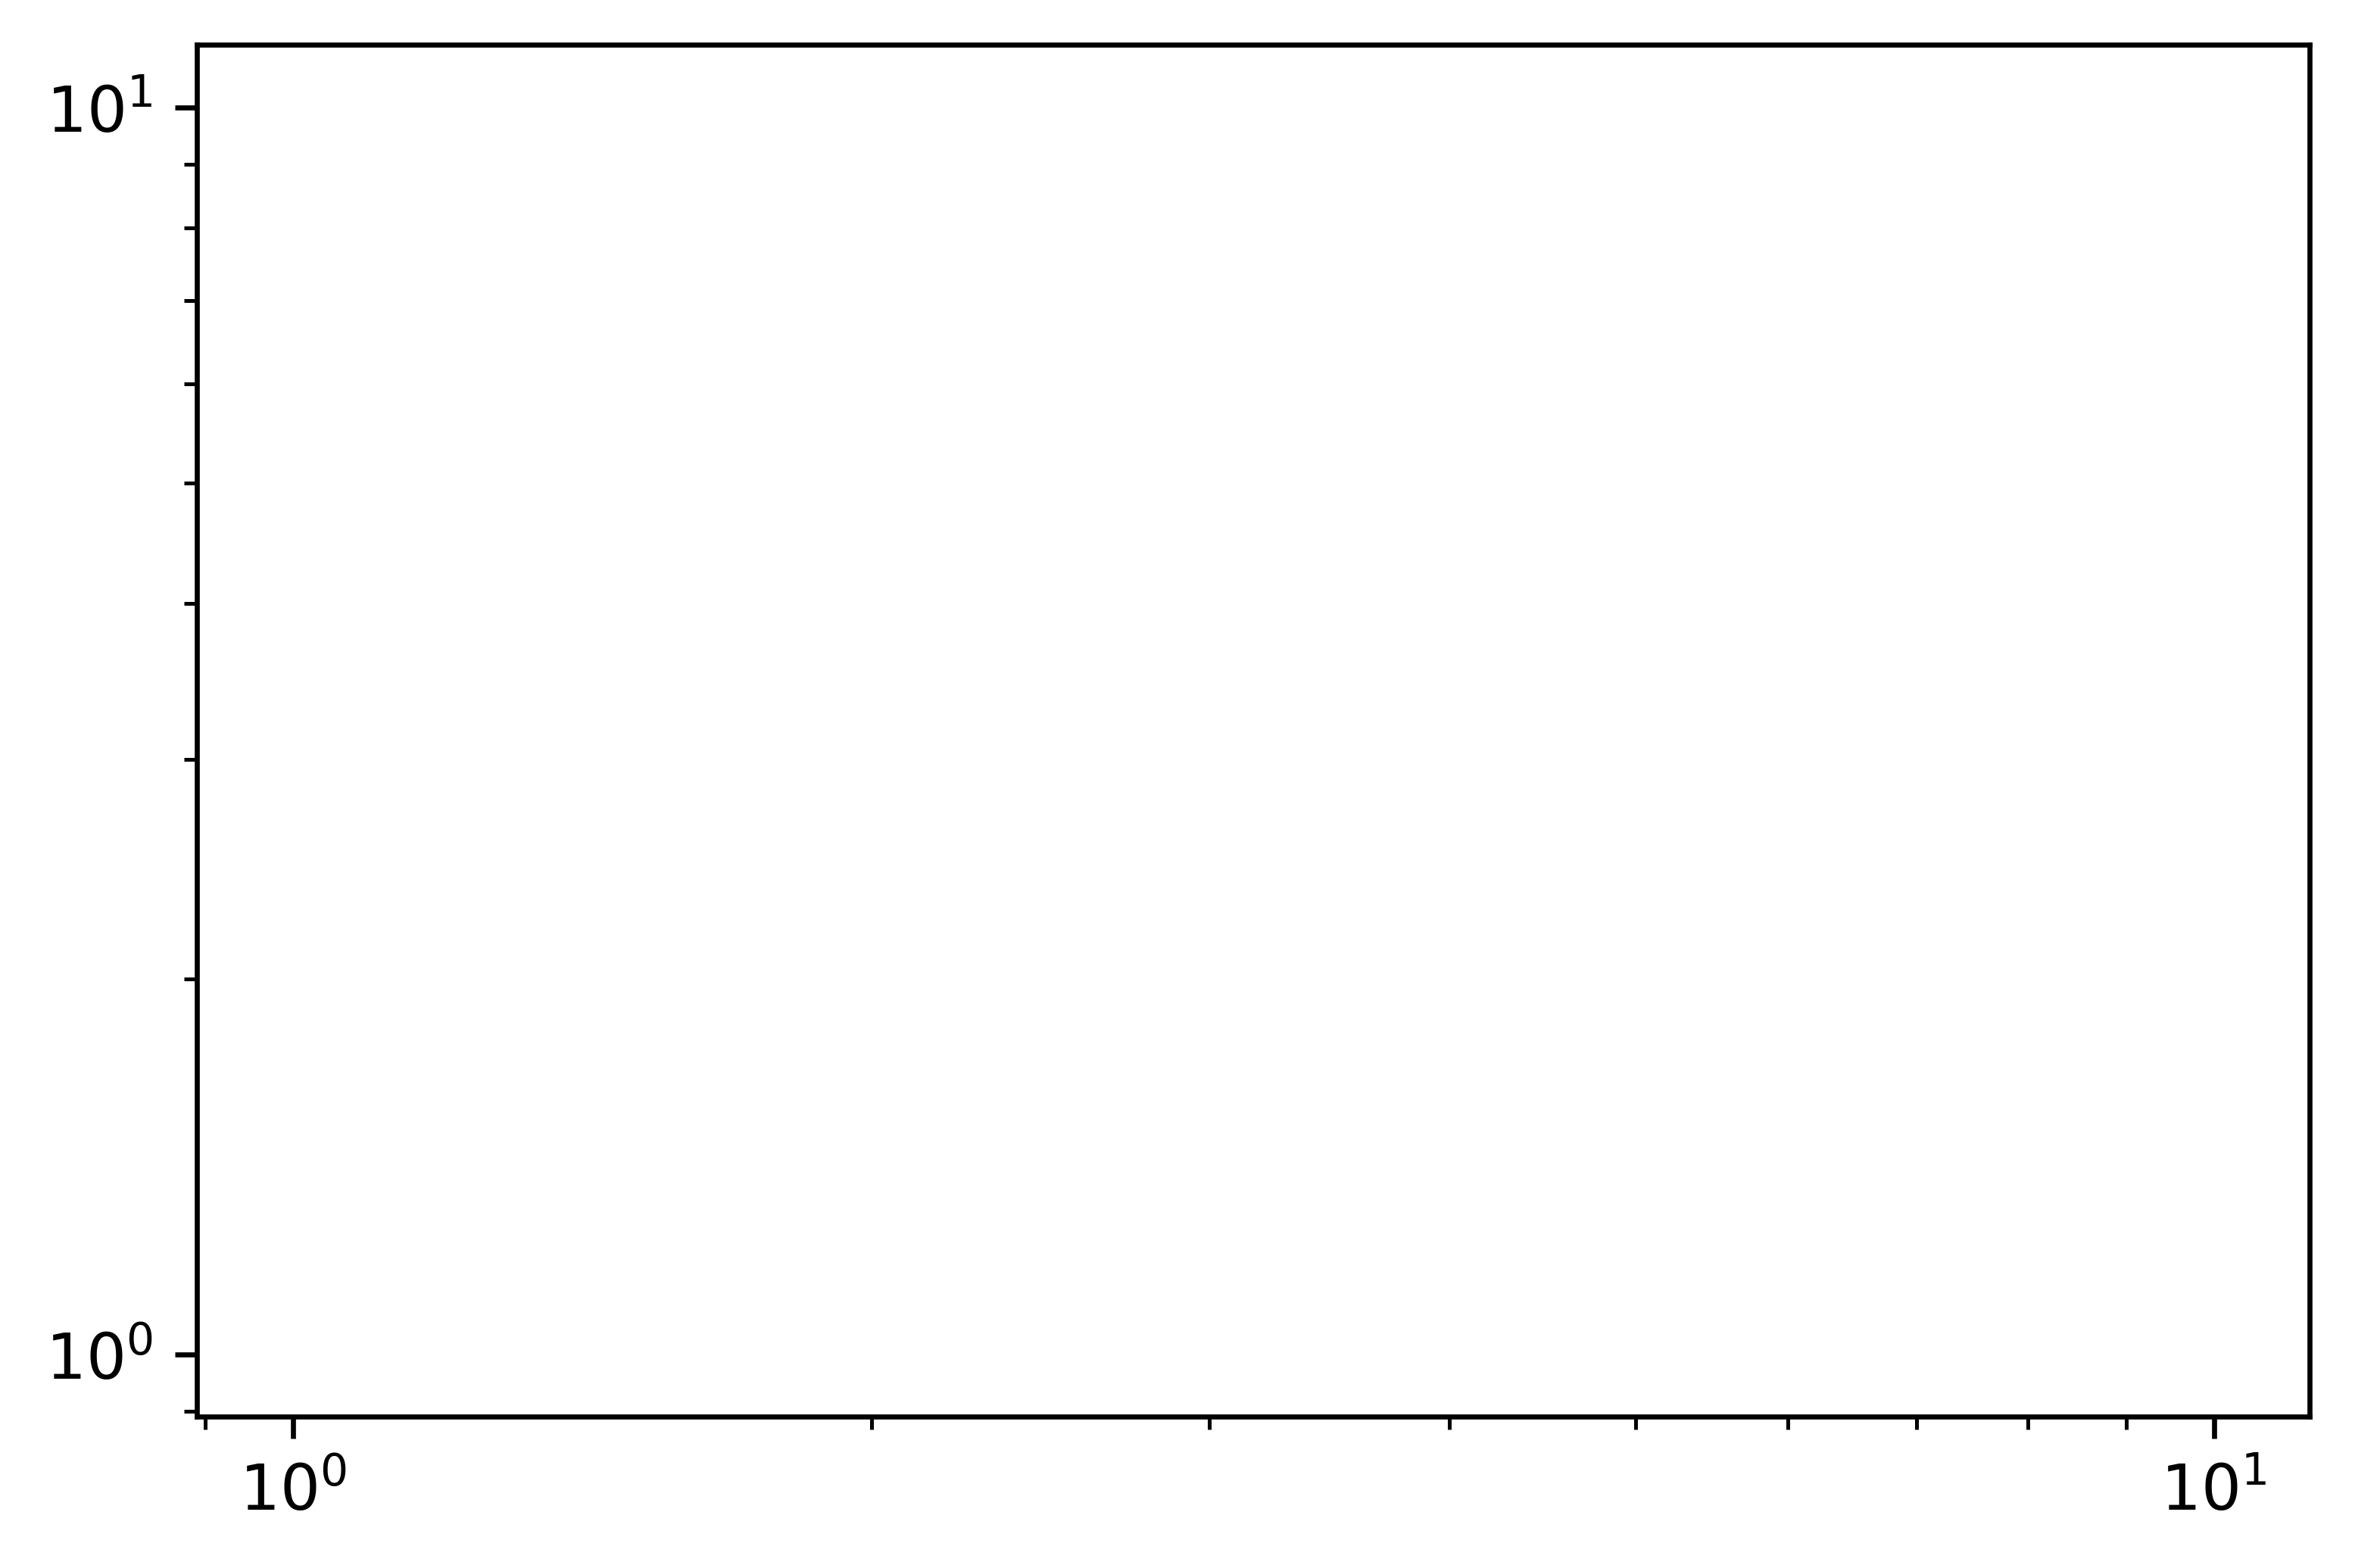

In [28]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set(xscale='log',yscale='log')
sns.scatterplot(data=human_df,x='Total_Volume',y='ef__avg_firing_rate', hue='structure__layer', palette=['#d0853d','#af5e53','#a9b08f','#6493af'])

In [31]:
set(human_df['structure__layer'])

{'1', '2', '3', '4', '5', '6'}